# Phân lớp ảnh bằng mô hình Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import copy
from collections import Counter
from sklearn.model_selection import train_test_split

### Đọc dữ liệu

In [2]:
# Đọc dữ liệu
train = np.genfromtxt("train.csv", delimiter=',')[1:]
Y = train[:, 0:1]
X = train[:, 1:]

### Hiển thị ảnh

In [3]:
def display_image(img):
    plt.figure(figsize=(1, 1))
    img = copy.copy(img.reshape((28, 28)))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

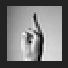

In [4]:
display_image(X[np.random.choice(range(0, X.shape[0]))])

### Tách tập dữ liệu thành tập train và tập test

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=45)

In [6]:
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

### Huấn luyện mô hình bằng thuật toán Stochastic gradient descent

In [7]:
def logistic_regression(X, Y, learning_rate=0.01):
    outputs = sorted(Counter(Y.reshape(Y.shape[0])).keys())
    W = np.zeros((X.shape[1], len(outputs) + 1))
    for output in outputs:
        w = np.zeros((X.shape[1], 1))
        N = X.shape[0]
        while True:
            binary_Y = np.where(Y == output, 1, -1)
            previous_w = copy.copy(w)
            rand_idxs = np.random.permutation(N)
            for idx in rand_idxs:
                x = X[idx].reshape(w.shape)
                y = binary_Y[idx, 0]
                gradient = -y * x / (1 + np.exp(y * w.T @ x))
                w -= learning_rate * gradient
            delta_w = previous_w - w
            if np.sqrt(delta_w.T @ delta_w) < 0.01:
                break
        print("Output {0} done!".format(int(output)), end="\r")
        W[:, int(output):int(output + 1)] = w
    return W

In [8]:
W = logistic_regression(X_train, Y_train)
print(W)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  


[[  -3.786497     -2.88852925   -0.95507394 ...  -21.05512662
   -13.88260196   -5.60503861]
 [ 175.66510927   42.32006399   47.57258006 ...   56.23357787
   281.98875612  146.33596017]
 [ 144.68361681   23.70161158   36.87236081 ...  139.88086215
   335.83500971  142.86088003]
 ...
 [ -22.14546065   42.2310087   118.80618094 ...  110.30674567
  -150.70658777  -16.1605241 ]
 [ -27.15258235   -6.14771245  195.44633597 ...  260.56199327
  -121.77027375 -136.64620525]
 [ -47.39007805  -93.16803381  235.04641882 ...    3.59511831
    58.73405755   -9.01061029]]


### Độ chính xác trên tập train

In [9]:
np.mean(
    Y_train.reshape(Y_train.shape[0]) == np.argmax(
        1 / (1 + np.exp(-X_train @ W)), axis=1))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


1.0

### Độ chính xác trên tập test

In [10]:
np.mean(
    Y_test.reshape(Y_test.shape[0]) == np.argmax(1 / (1 + np.exp(-X_test @ W)),
                                                 axis=1))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


0.9900740740740741